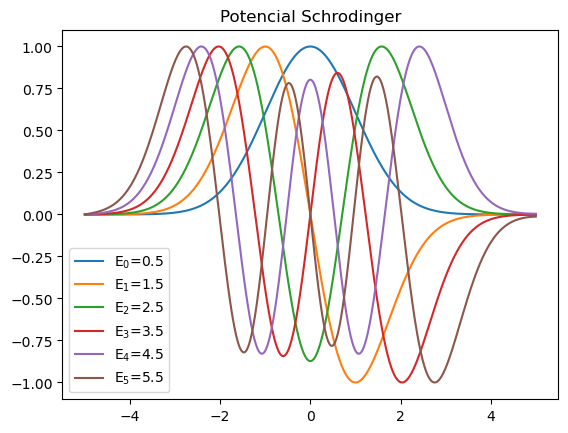

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def PotentialEnergy(x,E,m=1,h=1,omega=1):
    return ((2*m)/(h**2)) * (0.5*m*(omega**2)*(x**2)-E)

def Numerov(x,E,Potential):
    phi = np.zeros_like(x)
    phi[0] = 0
    phi[1] = 1e-5
    Potencial = Potential(x,E)
    h = x[1] - x[0]
    for i in range(2,len(x)):
        phimin1 = 1 - (((h**2)/12) * Potencial[i-2])
        psin = 1 + (((5 * h**2)/12) * Potencial[i-1])
        phiplus1 = 1 - (((h**2)/12) * Potencial[i])
        
        phi[i] = (2 * psin * phi[i-1] - phimin1 * phi[i-2]) / (phiplus1)
    
    return phi
        
        
x = np.linspace(-5,5,1000)
Ei = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
Espectro = np.array([])
for i in Ei:
    if Numerov(x,i,PotentialEnergy)[-1]*Numerov(x,i+0.001,PotentialEnergy)[-1] < 0:
        Espectro = np.append(Espectro,i)
        
plt.figure()
for i in range(len(Espectro)):
    element = Espectro[i]
    sol = Numerov(x,element,PotentialEnergy)
    plt.plot(x, sol/np.max(sol), label=(f'E$_{i}$'f'={element}'))
    plt.title("Potencial Schrodinger")
    plt.legend()

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 70.89it/s]


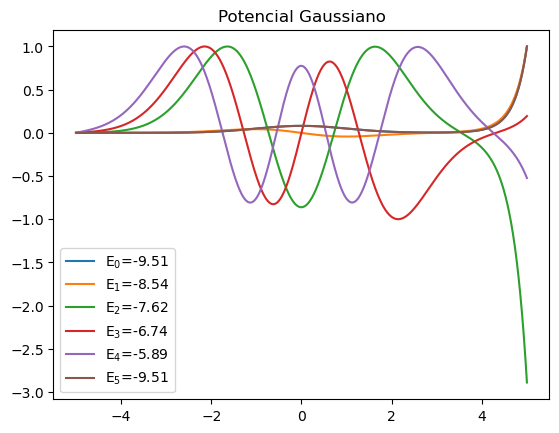

In [16]:
def GaussianPotential(x,E):
    return -20*np.exp((-x**2)/20) - 2*E

En = np.array([-9.51, -8.54, -7.62, -6.74, -5.89])
En1 =np.array([])
for i in En:
    if (Numerov(x,i,GaussianPotential)[-1] * Numerov(x,i+0.001,GaussianPotential)[-1]) < 0:
        En1 = np.append(En1,i)

plt.figure()
for i in range(len(En)):
    element = En[i]
    sol = Numerov(x,element,GaussianPotential)
    plt.plot(x, sol/np.max(sol), label=(f'E$_{i}$'f'={element}'))
    plt.title("Potencial Gaussiano")
    plt.legend()


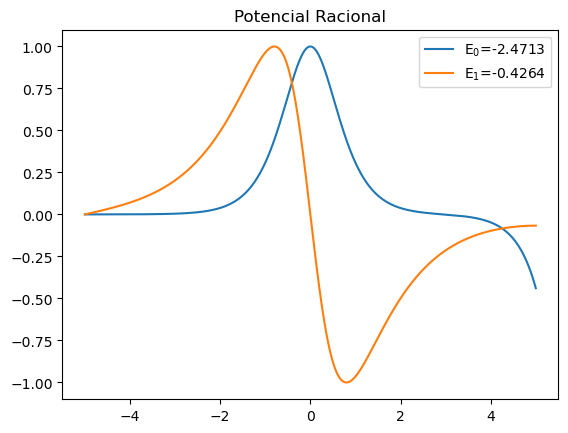

In [5]:
def RationalPotential(x,E):
    return ((-8) / (1+x**2)**2) - 2*E

En1 =np.array([])
En = np.array([-2.4713, -0.4264])
for i in En:
    if (Numerov(x,i,RationalPotential)[-1] * Numerov(x,i+0.001,RationalPotential)[-1]) < 0:
        En1 = np.append(En1,i)


plt.figure()
for i in range(len(En)):
    element = En[i]
    sol = Numerov(x,element,RationalPotential)
    plt.plot(x, sol/np.max(sol), label=(f'E$_{i}$'f'={element}'))
    plt.title("Potencial Racional")
    plt.legend()